# Notebook for UM Ginsberg Center Python/ML Tutorial

In this tutorial, we will be working with the dataset from the book [Why Civil Reistance Works](https://www.ericachenoweth.com/research/wcrw).

<img src ="images/why-civil-resistance-works.jpg" width = 240/>


If you want to learn more on this topic, there is a [lecture](https://www.youtube.com/watch?v=EHkzgDOMtYs) and [TEDx talk](https://www.youtube.com/watch?v=YJSehRlU34w) by Erica Chenoweth where she explains the background of this work and the main findings.

We will start by loading necessary python libraries and the data, which can be found in the book's link above. 

## 1. Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import machine learning libraries
# TODO: Fill in your specific ML algorithms

## 2. Load data

In [3]:
data = pd.read_stata('data/WCRWreplication.dta')
data.head() # Check data loads properly

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.2134,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.0950,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.3868,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0


In [4]:
# Print the name of the columns
print(data.columns)

Index(['defect', 'outcome', 'peakmembership', 'eyear', 'byear', 'location',
       'campaign', 'target', 'lccode', 'tccode', 'nonviol', 'viol', 'fselfdet',
       'regchange', 'secession', 'other', 'success', 'limited', 'failure',
       'ongoing', 'middleeast', 'americas', 'asia', 'fsu', 'europe', 'africa',
       'lpolity', 'tpolity', 'lgovcap', 'tgovcap', 'regviol', 'violsim',
       'extfor', 'statesup', 'regaid', 'sdirect', 'deltatpolity', 'deltatgdp',
       'lduration', 'lmembers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'cw', 'postcw', 'ixnNVmem', 'rgdppc',
       'growthrgdppc', 'lupop', 'recur5', 'recur10', 'polityt10', 'polityt1',
       'polityt5', 'politychanget10', 'politychanget1', 'politychanget5',
       'politychanget0', 'authdum', 'deltatgovcap', 'memdum', 'lnpop',
       'ixnNVpc', 'lpolity1', 'lcinc1', 'lgdppc', 'wars', 'lmtnest', 'ef',
       'loclpolity1', 'loclcap1', 'loclcap2', 'loclcap3', 'loclcap4', 'mempc',
       'demdum',

In [5]:
# Load descriptions for each vriable (column)
var_descriptors = pd.read_csv('data/WCRW_variables_descriptions.csv')
var_descriptors.head()

,Variable_Name,Source,Variable_Description
0,CAMPAIGN,Various encyclopedic entries; scholarly works;...,Name of campaign.
1,LOCATION,Various encyclopedic entries; scholarly works;...,Geographic base of campaign (country).
2,LCCODE,Correlates of War,Location country code.
3,BYEAR,Various encyclopedic entries; scholarly works;...,Year in which campaign begins.
4,EYEAR,Various encyclopedic entries; scholarly works;...,Year at which the campaign reaches its peak; i...


In [6]:
# Create dictionary of variable descriptions
dct_descriptors = {}
for i in range(var_descriptors.shape[0]):
    var_name = var_descriptors.Variable_Name[i].lower().strip()
    var_dscp = var_descriptors.Variable_Description[i]
    if var_name == 'ixnnvmem':
        var_name = 'ixnNVmem'
    elif var_name == 'ixnnvpc':
        var_name = 'ixnNVpc'
    dct_descriptors[var_name] = var_dscp
    

In [13]:
dct_descriptors['other']

'Dichotomous variable identifying purpose of campaign as distinct from previous three objectives (i.e. purpose is NOT to expel a foreign occupation, change a domestic regime, or territorial separation). However, these are major campaigns with “difficult” goals, which exclude labor rights, civil rights, and other types of campaigns. '

## 3. Explore data
In this section, we will start exploring the data so we have an idea of what we are working with. 

In [6]:
# Check the dimensions of the dataset
print('There are {} campaigns in the dataset.'.format(data.shape[0]))

There are 323 campaigns in the dataset.


### 3.1. Plot the outcomes of all the campaigns
In the 323 campaigns there are: 157 failed campaings (3), 54 campaigns with limited success (4), and 112 successful campaigns (5).

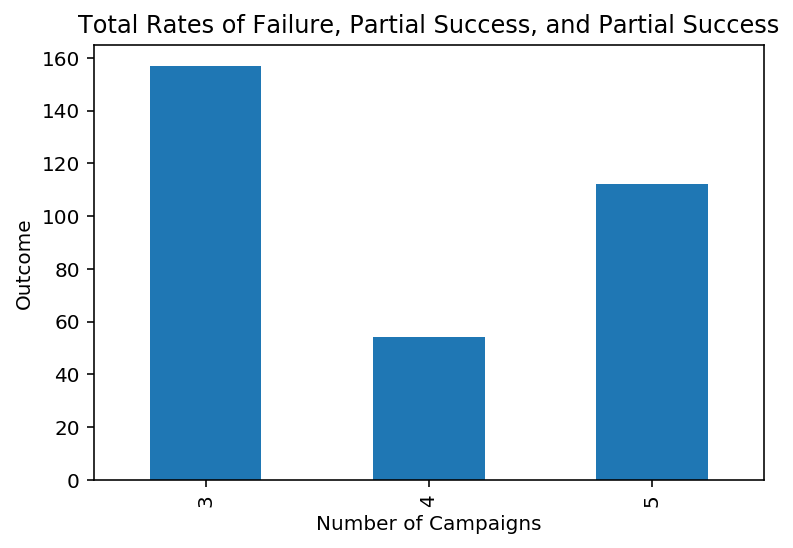

Failure: Dichotomous variable identifying whether the campaign achieved none of its stated goals; includes campaigns that have been suppressed.  

Limited Success: Dichotomous variable identifying whether the campaign achieved some of its stated goals within a year of the peak of activities. When a regime makes concessions to the campaign or reforms short of complete campaign success, such reforms are counted as limited success.  

Success: Dichotomous variable identifying whether the campaign achieved 100% of its stated goals within a year of the peak of activities. In most cases, outcome was achieved within a year of the campaign’s peak. Some campaigns’ goals were achieved years after the “peak” of the struggle in terms of membership, but the success was a direct result of campaign activities. When such a direct link can be demonstrated, these campaigns are coded as successful.


In [10]:
# Make bar plot of all outcomes
campaign_outcomes = data['outcome'].value_counts() # Subset outcome dataframe
campaign_outcomes.sort_index(inplace=True) # Sort dataframe by index
campaign_outcomes.plot(kind='bar') # Bar plot of dataframe
plt.xlabel('Number of Campaigns') # Define x-axis label
plt.ylabel('Outcome') # Define y-axis label
plt.title('Total Rates of Failure, Partial Success, and Partial Success') # Define plot title
plt.show() # Display plot

# Display definitions for failure, limited success, and success
print('Failure: {} \n'.format(dct_descriptors['failure'])) 
print('Limited Success: {} \n'.format(dct_descriptors['limited'])) 
print('Success: {}'.format(dct_descriptors['success']))

### 3.2. Plot figures from Chapter 1

#### Figure 1.1: Frequency of Nonviolent and Violent Campaign End Years

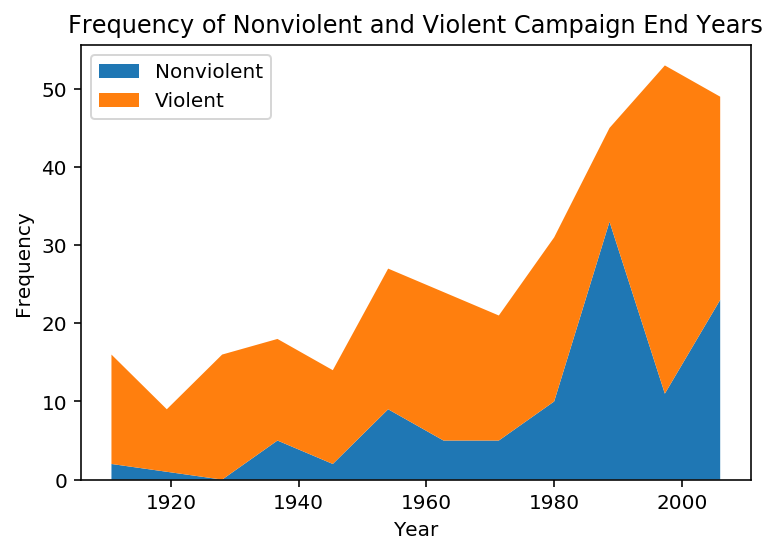

In [11]:
# Approximately recreate Figure 1.1 from book 

# Determine number of violent and nonviolent campaigns
# as a function of ~9 year intervals
y_n, x = np.histogram(data[data.nonviol==1.0]['eyear'], bins = 12) # Nonviolent 
y, x = np.histogram(data[data.nonviol==0.0]['eyear'], bins = 12) # Violent

# Adjust length of time array
x = x[:-1] + np.diff(x)

# Stack plot of nonviolent and violent campaigns
fig, ax = plt.subplots()
ax.stackplot(x, y_n, y)
plt.legend(['Nonviolent','Violent'], loc=2)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Nonviolent and Violent Campaign End Years')

plt.show()

#### Figure 1.2: Number of Nonviolent Campaigns and Percentage of Successes, 1940-2006

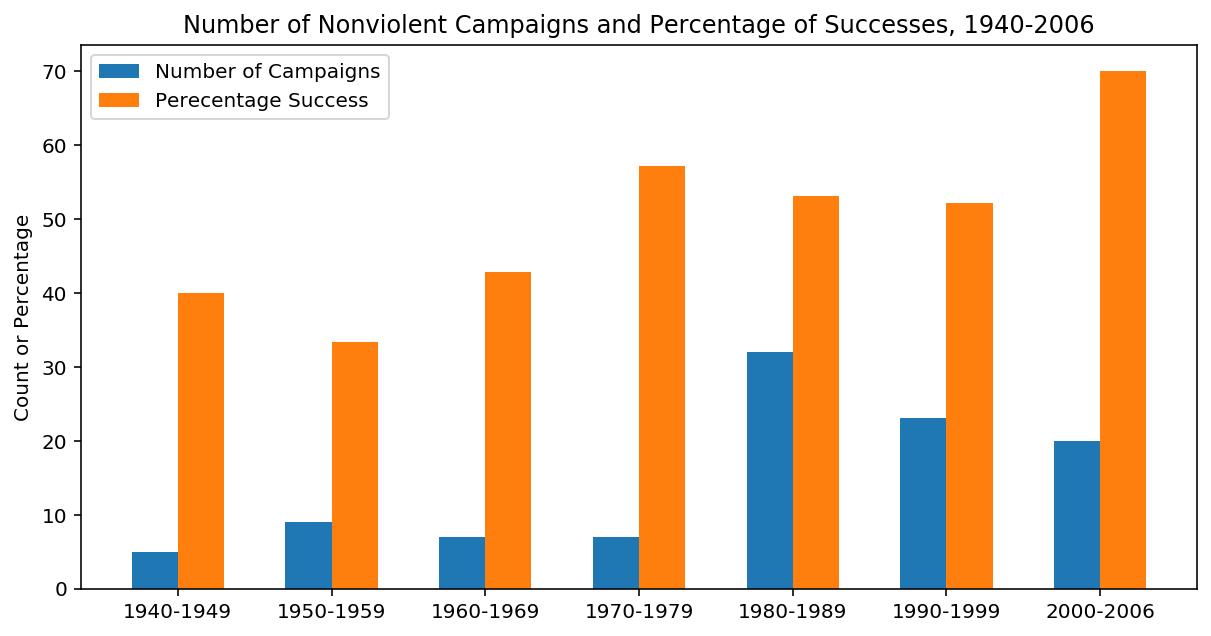

In [12]:
# Define years and ranges
years = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2007]
year_labels = ['{}-{}'.format(years[i-1], years[i]-1) for i in range(1,len(years))]

# Initiate variables
nonviol = 1.0 ## 1.0 means nonviolent, 0.0 means violent
num_campaigns = []
per_success = []

# Determine number of campaigns and successes
for i in range(1, len(years)):
    sub_data = data[(data.eyear >= years[i-1]) & (data.eyear <= years[i]-1)]
    num_campaigns.append(sub_data[sub_data.nonviol == nonviol].shape[0])
    num_success = sub_data[(sub_data.nonviol == nonviol) & (sub_data.outcome == 5)].shape[0]
    per_success.append(num_success / num_campaigns[i-1] * 100)

# Specify the values of blue bars (height)
blue_bar = num_campaigns
# Specify the values of orange bars (height)
orange_bar = per_success

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 3       

x = np.array(years[:-1])
# Plotting
plt.bar(np.array(x)-width/2, blue_bar , width, label='Number of Campaigns')
plt.bar(np.array(x)+width/2, orange_bar, width, label='Perecentage Success')
plt.ylabel('Count or Percentage')
plt.title('Number of Nonviolent Campaigns and Percentage of Successes, 1940-2006')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(x, year_labels)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Figure 1.3: Success Rates by Decade, 1940-2006

Recreate the following plot using code from Figure 1.2:

<img src="images/success_by_decade.png" width=600/>

In [ ]:
# Define years and ranges
years = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2007]
year_labels = ['{}-{}'.format(years[i-1], years[i]-1) for i in range(1,len(years))]

# Initiate variables
# TODO: Fill in code here

# Determine number of campaigns and successes
for i in range(1, len(years)):
    #TODO: Fill in code here

# Specify the values of blue bars (height)
blue_bar = # TODO: Fill in code here
# Specify the values of orange bars (height)
orange_bar = # TODO: Fill in code here

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 3       

x = np.array(years[:-1])
# Plotting
plt.bar(np.array(x)-width/2, blue_bar , width, label='Nonviolent')
plt.bar(np.array(x)+width/2, orange_bar, width, label='Violent')
plt.ylabel('Percentage')
plt.title('Success Rates by Decade, 1940-2006')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(x, year_labels)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Figure 1.4: Rates of Success, Partial Success, and Failure

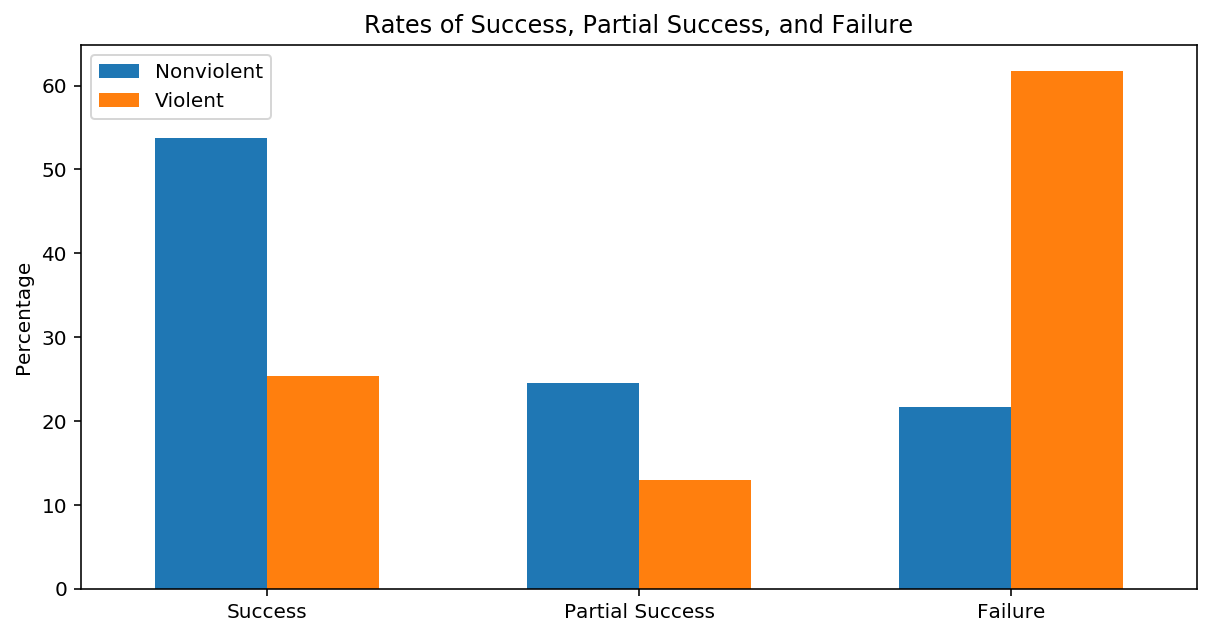

In [11]:
# Calculate outcome rates for nonviolent campaigns
sub_data = data[data.nonviol == 1.0]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df.sort_index(inplace=True) # Sort dataframe by index
outcomes = sub_df.index.tolist()
nonviol_bar = sub_df.values*100

# Calculate outcome rates for violent campaigns
sub_data = data[data.nonviol == 0.0]
sub_df = sub_data['outcome'].value_counts(normalize=True)
sub_df.sort_index(inplace=True) # Sort dataframe by index
viol_bar = sub_df.values*100

# Specify the values of blue bars (height)
blue_bar = nonviol_bar
# Specify the values of orange bars (height)
orange_bar = viol_bar

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(np.array(outcomes)+width/2, blue_bar , width, label='Nonviolent')
plt.bar(np.array(outcomes)-width/2, orange_bar, width, label='Violent')
plt.ylabel('Percentage')
plt.title('Rates of Success, Partial Success, and Failure')
plt.xlim(5.5, 2.5) # Revers direction of plot

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(outcomes[::-1], ('Success', 'Partial Success', 'Failure'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Figure 1.5: Success Rates by Campaign Objective

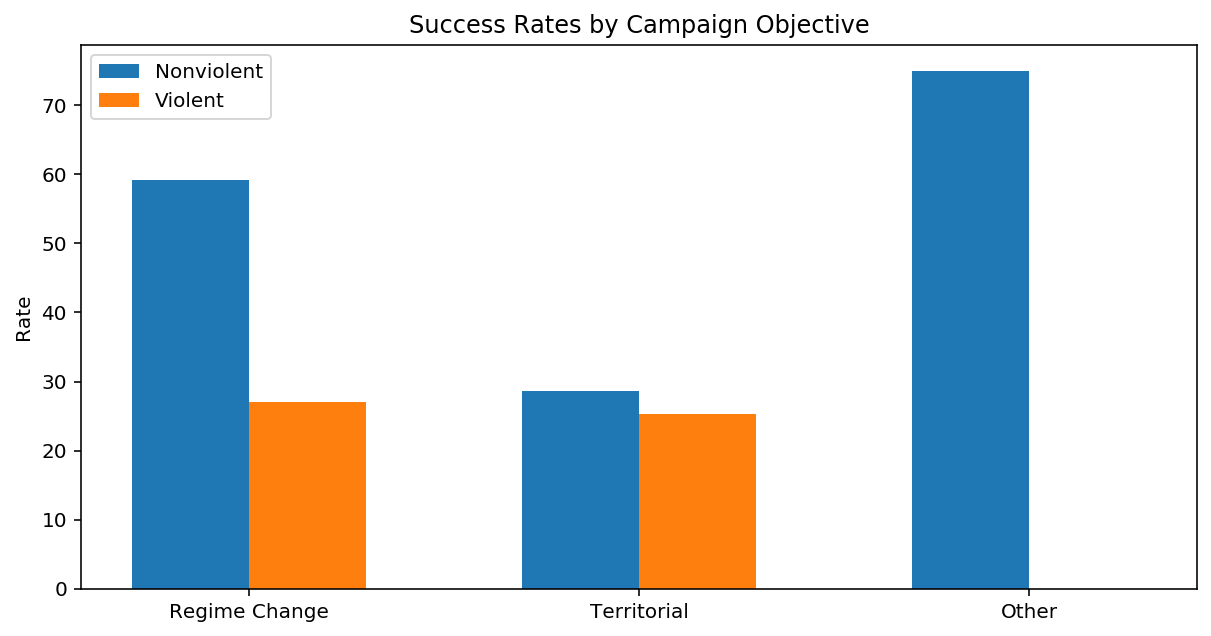

In [12]:
# Initialize success rates lists
nonviol_success = []
viol_success = []

# Success rate for regime change nonviolent campaigns
sub_data = data[(data.nonviol==1.0) & (data.regchange==1.0)]['outcome']
sub_data = sub_data.value_counts(normalize=True).sort_index()
nonviol_success.append(sub_data[5]*100)

# Success rate for regime change violent campaigns
sub_data = data[(data.nonviol==0.0) & (data.regchange==1.0)]['outcome']
sub_data = sub_data.value_counts(normalize=True).sort_index()
viol_success.append(sub_data[5]*100)

# Success rate for territorial nonviolent campaigns 
sub_data = data[(data.nonviol==1.0)]
sub_data = sub_data[(sub_data.secession==1.0) | (sub_data.fselfdet==1.0)]
sub_data = sub_data['outcome'].value_counts(normalize=True).sort_index()
nonviol_success.append(sub_data[5]*100)

# Success rate for territorial violent camapaigns
sub_data = data[(data.nonviol==0.0)]
sub_data = sub_data[(sub_data.secession==1.0) | (sub_data.fselfdet==1.0)]
sub_data = sub_data['outcome'].value_counts(normalize=True).sort_index()
viol_success.append(sub_data[5]*100)

# Success rate for other nonviolent campaigns
sub_data = data[(data.nonviol==1.0) & (data.other==1.0)]['outcome']
sub_data = sub_data.value_counts(normalize=True).sort_index()
nonviol_success.append(sub_data[5]*100)

# Success rate for other violent campaigns
sub_data = data[(data.nonviol==0.0) & (data.other==1.0)]['outcome']
sub_data = sub_data.value_counts(normalize=True).sort_index()
viol_success.append(0)

# Specify the values of blue bars (height)
blue_bar = nonviol_success
# Specify the values of orange bars (height)
orange_bar = viol_success

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

x = np.array([1, 2, 3])
# Plotting
plt.bar(np.array(x)-0.3/2, blue_bar , width, label='Nonviolent')
plt.bar(np.array(x)+0.3/2, orange_bar, width, label='Violent')
plt.ylabel('Rate')
plt.title('Success Rates by Campaign Objective')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(x, ('Regime Change', 'Territorial', 'Other'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## 4. Machine learning

1. Use ML models to predict success of a campaign
2. Is this a regression or classification problem?
2. What are the most important features that determine campaign success?